In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
col_pal =  plt.rcParams["axes.prop_cycle"].by_key()["color"]
import plotly.express as px
plt.style.use ("fivethirtyeight")
from fredapi import Fred
import env
pd.set_option("max_columns",500)
import json

In [2]:
fred_key = ""
# from kaggle_secrets import UserSecretsClients
# secrets = UserSecretsClients()
# fred_key = secrets.getsecret("fred-api")

In [3]:
fred=Fred(api_key = fred_key)

In [4]:
fred

In [5]:
# fred.search("S&P", order_by = "popularity")
fred.search("S&P").head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2022-11-04,2022-11-04,S&P 500,2012-11-05,2022-11-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-03 19:10:50-05:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2022-11-04,2022-11-04,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2022-11-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-04 08:36:09-05:00,53,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2022-11-04,2022-11-04,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,35,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2022-11-04,2022-11-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,90,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2022-11-04,2022-11-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-10-25 08:02:03-05:00,81,"For more information regarding the index, plea..."


# Pull Raw Data 


In [6]:
sp500 = fred.get_series(series_id = "SP500")

<AxesSubplot:title={'center':'S&P 500'}>

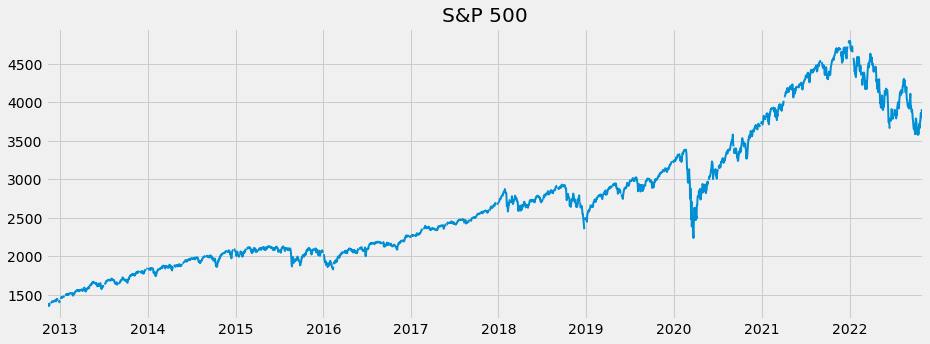

In [7]:
sp500.plot(figsize= (14,5), title = "S&P 500", lw = 2)

# 4. Pull multiple data series

In [8]:
unemp_results = fred.search("unemployment")

In [9]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-11-04,2022-11-04,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:03-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-11-04,2022-11-04,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-04 07:43:03-05:00,59,The unemployment rate represents the number of...
NROU,NROU,2022-11-04,2022-11-04,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,71,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-11-04,2022-11-04,Unemployment Level,1948-01-01,2022-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-11-04 07:44:06-05:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2022-11-04,2022-11-04,Continued Claims (Insured Unemployment),1967-01-07,2022-10-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-11-03 07:33:03-05:00,71,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN74TTEUQ156S,LRUN74TTEUQ156S,2022-11-04,2022-11-04,Unemployment Rate: Aged 15-74: All Persons for...,2005-01-01,2019-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2020-04-17 11:58:08-05:00,9,OECD descriptor ID: LRUN74TT OECD unit ID: STS...
LRHUTTTTFIM156S,LRHUTTTTFIM156S,2022-11-04,2022-11-04,Harmonised Unemployment - Monthly Rates: Total...,1988-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-14 14:54:08-05:00,9,OECD descriptor ID: LRHUTTTT OECD unit ID: STS...
LMUNRLTTFRM647S,LMUNRLTTFRM647S,2022-11-04,2022-11-04,Registered Unemployment Level for France,1960-01-01,2022-07-01,Monthly,M,Persons,Persons,Seasonally Adjusted,SA,2022-09-14 14:54:10-05:00,8,OECD descriptor ID: LMUNRLTT OECD unit ID: STS...


In [10]:
#PULL FROM ID IN UNEMP RESULTS
unemp_rate = fred.get_series("UNRATE")

In [11]:
unemp_rate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<AxesSubplot:>

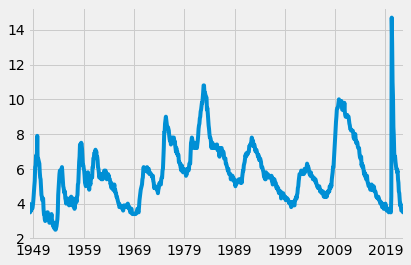

In [12]:
unemp_rate.plot()

In [13]:
unemp_df = fred.search("unemployment rate state", filter = ("frequency", "Monthly" ))
# running a query to find specific data that I am looking for
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]

In [14]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'LNS14000031', 'CAUR', 'M0892AUSM156SNBR',
       'M0892BUSM156SNBR', 'LNS14000024', 'TXUR', 'LNS14000002', 'FLUR',
       'NYUR', 'LNS14000009', 'U2RATE', 'LNS14027662', 'LNS14000003',
       'LNS14000001', 'LNS14027660', 'ALUR', 'OHUR', 'PAUR', 'MIUR', 'KYUR',
       'ILUR', 'LRUN64TTUSM156S', 'MNUR', 'NJUR', 'NCUR', 'LNS14032183',
       'AKUR', 'WIUR', 'MOUR', 'LASMT261982000000003', 'COUR', 'INUR', 'MAUR',
       'LNS14000012', 'GAUR', 'TNUR', 'VAUR', 'NDUR', 'UTUR', 'WAUR', 'IAUR',
       'WVUR', 'AZUR', 'ARUR', 'SCUR', 'LAUR', 'ORUR', 'OKUR', 'HIUR',
       'LNS14027659', 'NMUR', 'KSUR', 'MDUR', 'LASMT391746000000003',
       'LNS14000018', 'CTUR', 'SDUR', 'MTUR', 'NEUR', 'LNS14000060', 'MSUR',
       'NVUR', 'DCUR', 'IDUR', 'MEUR', 'LNS14024887', 'RIUR', 'NHUR',
       'LNS14000028', 'WYUR', 'PRUR', 'LNS14000032', 'DEUR', 'VTUR', 'CMWRUR',
       'LNS14000036', 'LNS14000029', 'LRUN24TTUSM156S', 'CNERUR',
       'LNS14000026', 'LNS14027689', 'LRHU

In [28]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
uemp_result = pd.concat(all_results, axis = 1)

In [29]:
uemp_result


,UNRATE,LNS14000006,LNS14000031,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,LNS14000024,TXUR,LNS14000002,FLUR,NYUR,LNS14000009,U2RATE,LNS14027662,LNS14000003,LNS14000001,LNS14027660,ALUR,OHUR,PAUR,MIUR,KYUR,ILUR,LRUN64TTUSM156S,MNUR,NJUR,NCUR,LNS14032183,AKUR,WIUR,MOUR,LASMT261982000000003,COUR,INUR,MAUR,LNS14000012,GAUR,TNUR,VAUR,NDUR,UTUR,WAUR,IAUR,WVUR,AZUR,ARUR,SCUR,LAUR,ORUR,OKUR,HIUR,LNS14027659,NMUR,KSUR,MDUR,LASMT391746000000003,LNS14000018,CTUR,SDUR,MTUR,NEUR,LNS14000060,MSUR,NVUR,DCUR,IDUR,MEUR,LNS14024887,RIUR,NHUR,LNS14000028,WYUR,PRUR,LNS14000032,DEUR,VTUR,CMWRUR,LNS14000036,LNS14000029,LRUN24TTUSM156S,CNERUR,LNS14000026,LNS14027689,LRHUTTTTUSM156S,CWSTUR,LRUNTTTTUSM156S,LNS14000315,CSOUUR,CNEWUR,LNS14024230,LNS14000061,LNS14000062,LNS14000025,LNS14000089,LNS14000048,LNS14000150,LNS14200000,LRUN25TTUSM156S
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,3.6,5.8,5.3,4.2,NaN,NaN,3.3,4.1,3.6,2.8,4.4,4.3,1.6,2.1,3.3,3.6,3.6,2.6,3.9,4.5,4.3,3.7,4.5,3.664021,1.8,3.9,3.4,3.0,4.6,2.9,2.8,4.4,3.4,2.4,3.7,11.0,2.9,3.3,2.8,2.5,2.0,3.8,2.6,3.6,3.3,3.2,3.2,3.8,3.5,2.9,4.2,5.8,4.9,2.4,4.0,5.5,16.1,4.0,2.3,2.6,1.9,3.0,3.8,4.7,5.5,2.5,3.0,8.1,2.7,2.0,3.1,3.1,6.1,5.6,4.5,2.2,3.3,6.8,2.9,8.1,4.1,3.3,3.1,3.6,3.8,3.6,2.3,3.4,3.5,2.7,2.9,3.2,3.3,3.4,3.0,2.0,3.9,3.0
2022-07-01,3.5,6.0,5.7,3.9,NaN,NaN,3.1,4.0,3.4,2.7,4.3,3.9,1.6,2.0,3.1,3.5,3.6,2.6,3.9,4.3,4.2,3.7,4.4,3.540636,1.8,3.7,3.4,2.6,4.5,3.0,2.5,4.1,3.3,2.6,3.5,11.5,2.8,3.3,2.7,2.3,2.0,3.7,2.5,3.7,3.3,3.3,3.2,3.7,3.5,2.9,4.0,5.9,4.5,2.4,3.9,5.3,20.3,3.7,2.3,2.7,2.0,2.9,3.6,4.4,5.2,2.6,2.8,7.8,2.7,2.0,3.0,3.0,5.9,5.3,4.4,2.1,3.3,6.4,2.6,7.8,4.0,3.1,2.